In [219]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter, MultipleLocator
import numpy as np
import seaborn as sns
from IPython.display import display

#Freiburg Bikes Sets
freiburg_dataset = "./Freiburg_bikes.csv"
df_freiburg_all = pd.read_csv(freiburg_dataset)

#df_freiburg.shape #(245472, 5)
#df_freiburg_all.info()

# I want to drop the column Datetime for now
df_freiburg = df_freiburg_all.drop(columns='Datetime')

# I also want to sort my DataFrame, depending on the "Datum" column and also by the "Stunde" column
df_freiburg = df_freiburg.sort_values(by=['Datum','Stunde'], ascending=[True, True])

# Reset the index of the DataFrame to a continuous sequence starting from 0 to the last value using the reset_index() method with the parameter drop=True.
df_freiburg.reset_index(drop=True, inplace=True)

df_freiburg.info()

# Convert 'Datum' column to datetime
df_freiburg['Datum'] = pd.to_datetime(df_freiburg['Datum'])

# Rename the columns
df_freiburg = df_freiburg.rename(columns={
    'Datum': 'Date',
    'Stunde': 'Hour',
    'Fahrrad-Zählstelle': 'Location',
    'Anzahl Fahrräder': 'TotalBikeCount'
})

# Display the DataFrame to verify the changes
print(df_freiburg.head())

# Get list of unique locations names
unique_locations = df_freiburg['Location'].unique()
print(unique_locations)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245472 entries, 0 to 245471
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Datum               245472 non-null  object
 1   Stunde              245472 non-null  int64 
 2   Fahrrad-Zählstelle  245472 non-null  int64 
 3   Anzahl Fahrräder    245472 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
        Date  Hour  Location  TotalBikeCount
0 2015-01-01     0         1              16
1 2015-01-01     0         2               8
2 2015-01-01     0         3               6
3 2015-01-01     0         4              18
4 2015-01-01     1         1              41
[1 2 3 4]


        Date  Location  TotalBikeCount
0 2015-01-01         1             726
1 2015-01-01         2             201
2 2015-01-01         3             448
3 2015-01-01         4             925
4 2015-01-02         1            1169


/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

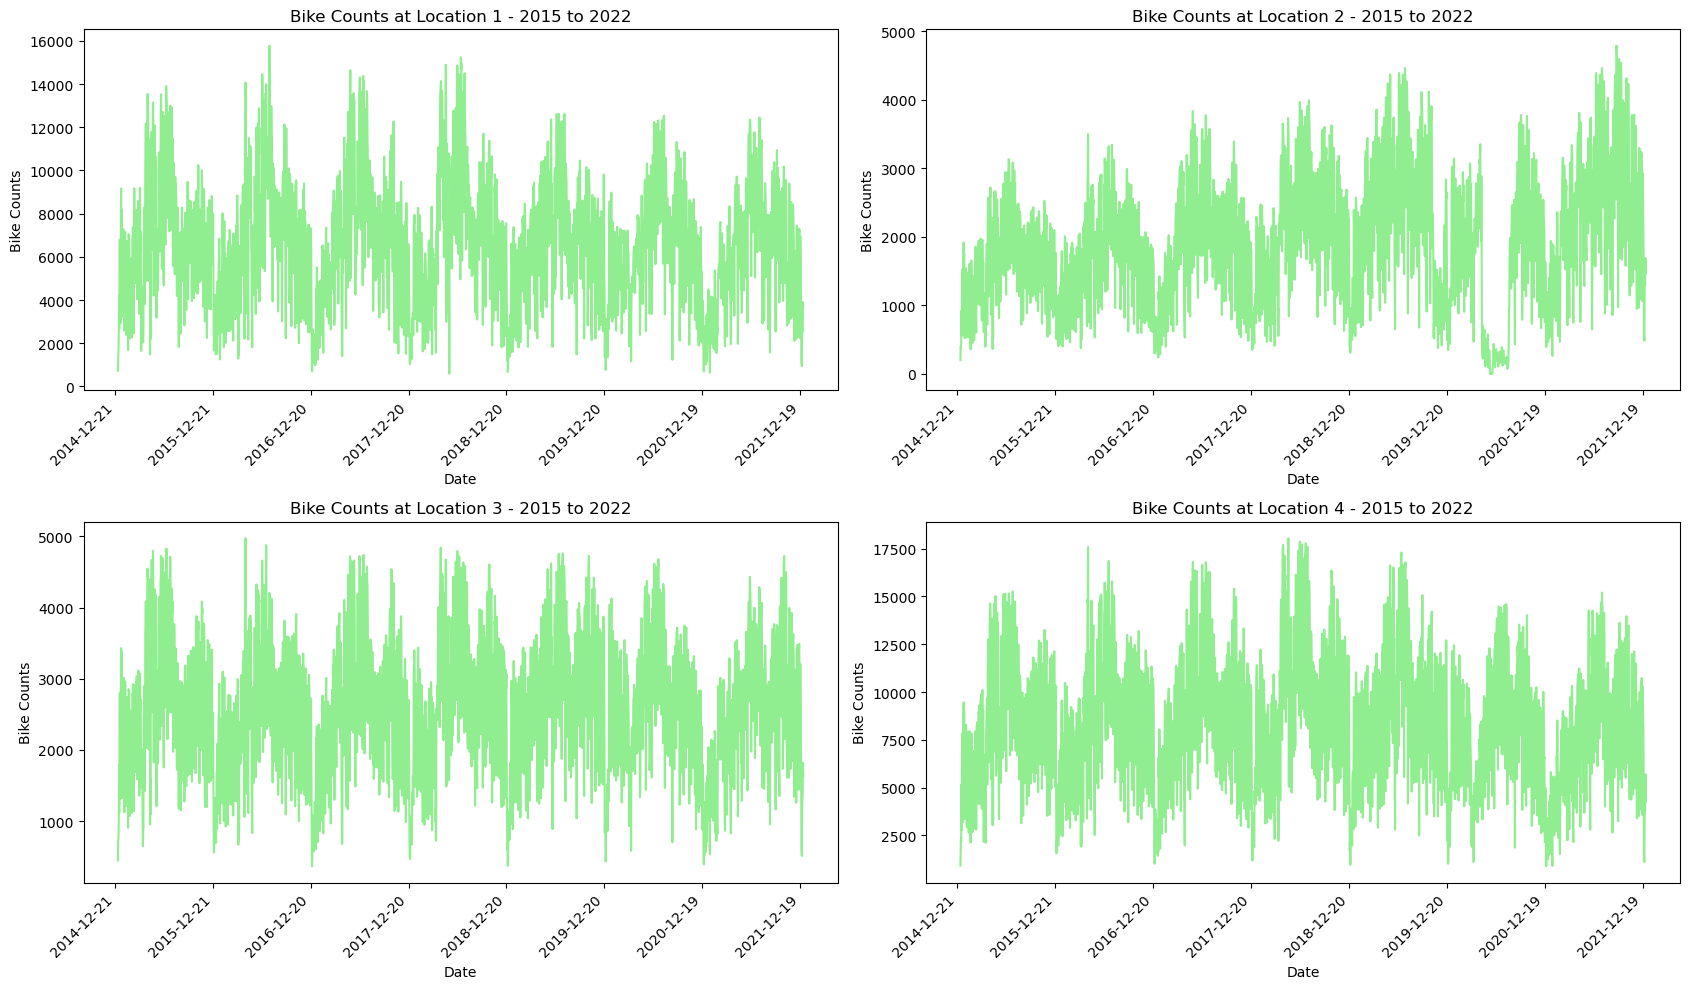

In [178]:
# Convert 'Date' column to datetime
df_freiburg['Date'] = pd.to_datetime(df_freiburg['Date'])

# Group by 'Date' and 'Location' and sum the 'TotalBikeCount' values
df_daily_counts = df_freiburg.groupby(['Date', 'Location'])['TotalBikeCount'].sum().reset_index()

print(df_daily_counts.head())

# Create a figure and six subplots
fig, axs = plt.subplots(2, 2, figsize=(17, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()


# Iterate over each unique location
for i, location in enumerate(unique_locations):
    # Filter the DataFrame for the current location
    df_location = df_daily_counts[df_daily_counts['Location'] == location]

    # Plotting
    # Set the current subplot
    plt.sca(axs[i])

    # Plot bike counts as a bar plot in grey color
    sns.lineplot(data=df_location, x=df_location['Date'].dt.date, y='TotalBikeCount', color='lightgreen')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    # Adjust layout to prevent overlap
    plt.gca().xaxis.set_major_locator(MultipleLocator(365))

    # Add title and labels
    plt.title(f'Bike Counts at Location {location} - 2015 to 2022')
    plt.xlabel('Date')
    plt.ylabel('Bike Counts')


plt.tight_layout()

# Show plot
plt.show()


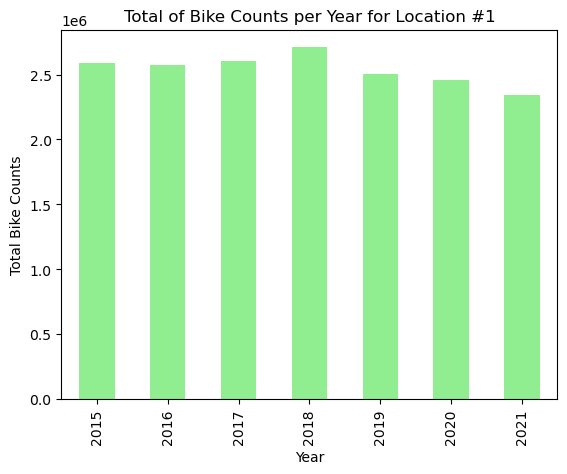

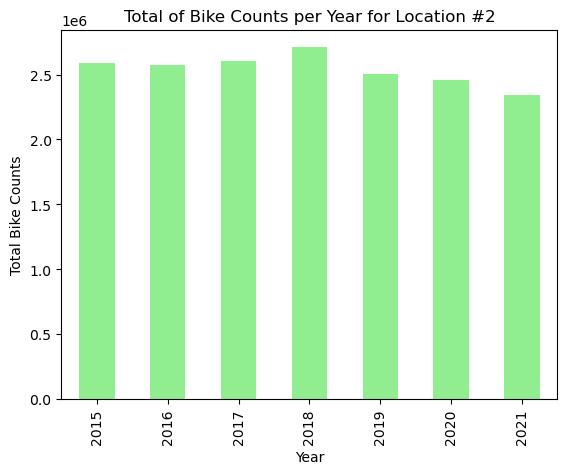

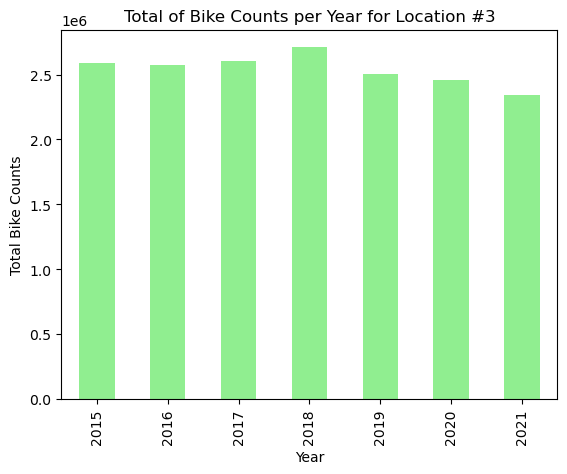

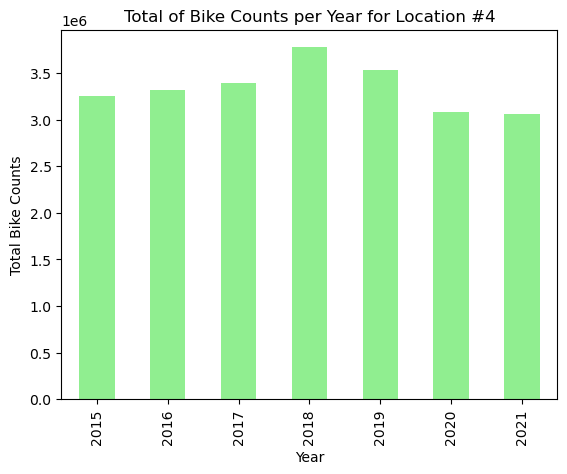

In [179]:
# Convert 'Date' column to datetime
df_daily_counts['Date'] = pd.to_datetime(df_daily_counts['Date'])

# Extract year from 'Date' column
df_daily_counts['Year'] = df_daily_counts['Date'].dt.year

# Filter data for Location 1
location_1_data = df_daily_counts[df_daily_counts['Location'] == 1]

# Group by 'Year' and sum the 'TotalBikeCount' for Location 1
yearly_counts_location_1 = location_1_data.groupby('Year')['TotalBikeCount'].sum()

# Plotting
yearly_counts_location_1.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='lightgreen', title='Total of Bike Counts per Year for Location #1')
plt.show()

# Filter data for Location 2
location_2_data = df_daily_counts[df_daily_counts['Location'] == 2]

# Group by 'Year' and sum the 'TotalBikeCount' for Location 2
yearly_counts_location_2 = location_1_data.groupby('Year')['TotalBikeCount'].sum()

# Plotting
yearly_counts_location_2.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='lightgreen', title='Total of Bike Counts per Year for Location #2')
plt.show()

# Filter data for Location 3
location_3_data = df_daily_counts[df_daily_counts['Location'] == 3]

# Group by 'Year' and sum the 'TotalBikeCount' for Location 2
yearly_counts_location_3 = location_1_data.groupby('Year')['TotalBikeCount'].sum()

# Plotting
yearly_counts_location_3.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='lightgreen', title='Total of Bike Counts per Year for Location #3')
plt.show()

# Filter data for Location 4
location_4_data = df_daily_counts[df_daily_counts['Location'] == 4]

# Group by 'Year' and sum the 'TotalBikeCount' for Location 4
yearly_counts_location_4 = location_4_data.groupby('Year')['TotalBikeCount'].sum()

# Plotting
yearly_counts_location_4.plot(kind='bar', xlabel='Year', ylabel='Total Bike Counts', color='lightgreen', title='Total of Bike Counts per Year for Location #4')
plt.show()


In [180]:
top_5 = df_daily_counts.nlargest(5, 'TotalBikeCount')
print(top_5)

location_1_top = df_daily_counts[df_daily_counts['Location'] == 1]
top_5_1 = location_1_top.nlargest(5, 'TotalBikeCount')
print(top_5_1)

           Date  Location  TotalBikeCount  Year
4895 2018-05-08         4           18043  2018
5067 2018-06-20         4           17873  2018
5155 2018-07-12         4           17777  2018
5095 2018-06-27         4           17728  2018
4815 2018-04-18         4           17696  2018
           Date  Location  TotalBikeCount  Year
2260 2016-07-19         1           15773  2016
5116 2018-07-03         1           15242  2018
5124 2018-07-05         1           14973  2018
4892 2018-05-08         1           14892  2018
5064 2018-06-20         1           14861  2018


In [181]:
#Freiburg Bikes - New Sets - Location 1
fr1_dataset = "./FR1.csv"
df_fr1 = pd.read_csv(fr1_dataset)
df_fr1.info()
df_fr1['Date'] = pd.to_datetime(df_fr1['Date'])
# Added new column for the location
df_fr1['Location'] = '1'
# Reorder the columns
df_fr1 = df_fr1[['Date', 'Location', 'Total']]

# Filtering the date
df_fr1 = df_fr1[df_fr1['Date']>='2015-01-01']
df_fr1 = df_fr1.reset_index()
# Display the updated DataFrame
# print(df_fr1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3505 entries, 0 to 3504
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3505 non-null   object
 1   Total   3505 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 54.9+ KB


In [182]:
#Freiburg Bikes - New Sets - Location 1
fr2_dataset = "./FR2.csv"
df_fr2 = pd.read_csv(fr2_dataset)
df_fr2.info()
df_fr2['Date'] = pd.to_datetime(df_fr2['Date'])
# Added new column for the location
df_fr2['Location'] = '2'
# Reorder the columns
df_fr2 = df_fr2[['Date', 'Location', 'Total']]

# Filter the DataFrame to include only rows with dates from 01.01.2015 onwards
df_fr2 = df_fr2[df_fr2['Date'] >= '2015-01-01']
df_fr2 = df_fr2.reset_index()

# Display the updated DataFrame
# print(df_fr2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3505 entries, 0 to 3504
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3505 non-null   object
 1   Total   3505 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 54.9+ KB


In [183]:
#Freiburg Bikes - New Sets - Location 1
fr3_dataset = "./FR3.csv"
df_fr3 = pd.read_csv(fr3_dataset)
df_fr3.info()
df_fr3['Date'] = pd.to_datetime(df_fr3['Date'])
# Added new column for the location
df_fr3['Location'] = '3'
# Reorder the columns
df_fr3 = df_fr3[['Date', 'Location', 'Total']]

# Display the updated DataFrame
# print(df_fr3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3352 non-null   object
 1   Total   3352 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 52.5+ KB


In [184]:
#Freiburg Bikes - New Sets - Location 4
fr4_dataset = "./FR4.csv"
df_fr4 = pd.read_csv(fr4_dataset)
df_fr4.info()
df_fr4['Date'] = pd.to_datetime(df_fr4['Date'])

# Added new column for the location
df_fr4['Location'] = '4'
# Reorder the columns
df_fr4 = df_fr4[['Date', 'Location', 'Total']]

# Filter the DataFrame to include only rows with dates from 01.01.2015 onwards
df_fr4 = df_fr4[df_fr4['Date'] >= '2015-01-01']
df_fr4 = df_fr4.reset_index()

# Display the updated DataFrame
# print(df_fr4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327 entries, 0 to 4326
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4327 non-null   object
 1   Total   4327 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.7+ KB


In [185]:
df_frei_all = pd.concat([df_fr1,df_fr2,df_fr3,df_fr4], ignore_index=True)
df_frei_all = df_frei_all.drop(columns='index')
print(df_frei_all)

            Date Location  Total
0     2015-01-01        1    726
1     2015-01-02        1   1169
2     2015-01-03        1   1667
3     2015-01-04        1   2126
4     2015-01-05        1   4213
...          ...      ...    ...
13403 2024-03-01        4  15490
13404 2024-03-02        4   9025
13405 2024-03-03        4   5291
13406 2024-03-04        4  10691
13407 2024-03-05        4  10860

[13408 rows x 3 columns]


## Adding Weather to the Notebook

In [186]:
# Read the CSV file into a DataFrame
df_f_weather = pd.read_csv('FreiburgWeather.csv')

# Convert the 'MESS_DATUM' column to datetime format
df_f_weather['MESS_DATUM'] = pd.to_datetime(df_f_weather['MESS_DATUM'], format='%Y%m%d%H')

# Display the DataFrame
print(df_f_weather)

# Group the hourly based data recordings to a daily base and create new columns with the minimum and maximum values
df_f_weather_grouped = df_f_weather.groupby(df_f_weather['MESS_DATUM'].dt.date).agg({
    'TT_TER': ['min', 'max']
}).reset_index()

# We keep the columns that we want only
df_f_weather_grouped.columns = ['date', 'min.temp', 'max.temp']


# Convert the 'date' column in df_f_w_g to datetime
df_f_weather_grouped['date'] = pd.to_datetime(df_f_weather_grouped['date'])

# Filter df_f_w_g to include only dates equal to or after 2015-01-01
start_date = pd.to_datetime('2015-01-01')
df_f_w_g_filtered = df_f_weather_grouped[df_f_weather_grouped['date'] >= start_date]

# Perform the join based on the 'Datum' column
merged_df = pd.merge(df_f_w_g_filtered, df_frei_all, left_on='date', right_on='Date')

# Drop the duplicate 'Datum' column
merged_df.drop(columns=['Date'], inplace=True)

print(merged_df)

# Group by 'date' and aggregate the other columns
aggregated_df = merged_df.groupby(['date','Location']).agg({
    'min.temp': 'first',               # Keep the first value of 'min.temp'
    'max.temp': 'first',               # Keep the first value of 'max.temp'
    'Total': 'sum'                     # Sum the values of 'Total'
}).reset_index()                      # Reset index to make 'date' a column again

# Save the DataFrame to a CSV file
# aggregated_df.to_csv('FreiburgWeatherData.csv', index=False)

# print(aggregated_df)
# Round up the decimals in 'min.temp' and 'max.temp' columns and convert to integers
aggregated_df['min.temp'] = aggregated_df['min.temp'].round().astype(int)
aggregated_df['max.temp'] = aggregated_df['max.temp'].round().astype(int)

# Display the updated DataFrame
print(aggregated_df)
aggregated_df.to_csv('aggregated_df.csv', index=False)


        STATIONS_ID          MESS_DATUM  QN_4  TT_TER  RF_TER  eor
0              1443 1874-01-01 07:00:00     1     4.6    78.0  eor
1              1443 1874-01-01 14:00:00     1     3.4    97.0  eor
2              1443 1874-01-01 21:00:00     1     3.5    98.0  eor
3              1443 1874-01-02 07:00:00     1     2.1   100.0  eor
4              1443 1874-01-02 14:00:00     1     3.7    91.0  eor
...             ...                 ...   ...     ...     ...  ...
133845         1443 2022-12-31 00:00:00     3    16.7    62.0  eor
133846         1443 2022-12-31 06:00:00     3    14.6    71.0  eor
133847         1443 2022-12-31 12:00:00     3  -999.0  -999.0  eor
133848         1443 2022-12-31 18:00:00     3  -999.0  -999.0  eor
133849         1443 2023-01-01 00:00:00     3  -999.0  -999.0  eor

[133850 rows x 6 columns]
            date  min.temp  max.temp Location  Total
0     2015-01-01      -4.7      -1.8        1    726
1     2015-01-01      -4.7      -1.8        2    201
2     2015

In [196]:
print(aggregated_df[aggregated_df['min.temp'] == -999]) # There are 96 Rows which contain "wrong" data for the Min Temperature

            date Location  min.temp  max.temp  Total
188   2015-02-17        1      -999         1   5059
189   2015-02-17        2      -999         1   1226
190   2015-02-17        3      -999         1   2193
191   2015-02-17        4      -999         1   6159
192   2015-02-18        1      -999         5   5702
...          ...      ...       ...       ...    ...
11683 2022-12-31        4      -999        17   4672
11684 2023-01-01        1      -999      -999   2637
11685 2023-01-01        2      -999      -999   1410
11686 2023-01-01        3      -999      -999   1262
11687 2023-01-01        4      -999      -999   2966

[96 rows x 5 columns]


## Try to handle the obvious outliers (-999)

In [214]:
df_freiburg_1 = aggregated_df[aggregated_df['Location'] == '1']

# Outliers
df_freiburg_1_outliers = df_freiburg_1[df_freiburg_1['min.temp'] == -999]
df_freiburg_1_outliers['month'] = df_freiburg_1_outliers['date'].dt.month
# Good values
df_freiburg_1_good_values = df_freiburg_1[df_freiburg_1['min.temp'] != -999]
df_freiburg_1_good_values['month'] = df_freiburg_1_good_values['date'].dt.month
df_freiburg_1_month_avg = df_freiburg_1_good_values.groupby(df_freiburg_1_good_values['date'].dt.month).agg({
    'month':'first',
    'min.temp':'mean',
    'max.temp' : 'mean'
})
df_freiburg_1_month_avg.rename(columns={'min.temp':'min','max.temp':'max'}, inplace=True)
df_freiburg_1_month_avg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   12 non-null     int32  
 1   min     12 non-null     float64
 2   max     12 non-null     float64
dtypes: float64(2), int32(1)
memory usage: 288.0 bytes


/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_50697/3643660126.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freiburg_1_outliers['month'] = df_freiburg_1_outliers['date'].dt.month
/var/folders/ch/91lhzbmj5qz7s7pzsvt5_5t00000gn/T/ipykernel_50697/3643660126.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freiburg_1_good_values['month'] = df_freiburg_1_good_values['date'].dt.month


In [215]:
df_freiburg_1_outliers = pd.merge(df_freiburg_1_outliers, df_freiburg_1_month_avg, on='month')
df_freiburg_1_outliers = df_freiburg_1_outliers.drop(columns=['min.temp','max.temp','month'])
df_freiburg_1_outliers.rename(columns={'min':'min.temp','max':'max.temp'}, inplace=True)

In [216]:
df_freiburg_1_good_values=df_freiburg_1_good_values.drop(columns=['Location', 'month'])
df_freiburg_1_outliers = df_freiburg_1_outliers[['date','min.temp','max.temp','Total']]
df_freiburg_1 = pd.concat([df_freiburg_1_good_values, df_freiburg_1_outliers], ignore_index=True)

/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/caropaez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

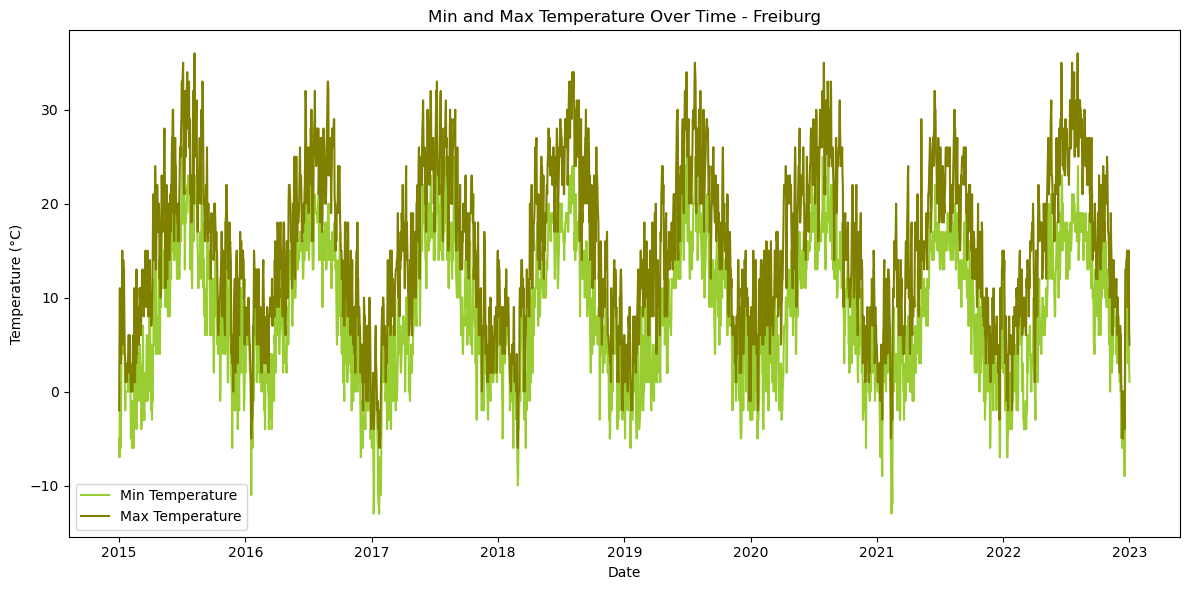

In [226]:
# Create a figure for temperature plot
plt.figure(figsize=(12, 6))

# Plot min temperature
sns.lineplot(data=df_freiburg_1, x='date', y='min.temp', color='yellowgreen', label='Min Temperature')

# Plot max temperature
sns.lineplot(data=df_freiburg_1, x='date', y='max.temp', color='olive', label='Max Temperature')

# Set title and labels
plt.title('Min and Max Temperature Over Time - Freiburg')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


## Correlation Analysis

           date  min.temp  max.temp  Total  avg.temp
0    2015-01-01      -5.0      -2.0    726      -4.0
1    2015-01-02      -7.0       6.0   1169      -0.0
2    2015-01-03       1.0      11.0   1667       6.0
3    2015-01-04       1.0       5.0   2126       3.0
4    2015-01-05      -5.0       4.0   4213      -0.0
...         ...       ...       ...    ...       ...
2917 2021-10-15       8.0      15.0   8848      12.0
2918 2021-12-26       3.0       7.0    936       5.0
2919 2021-12-27       3.0       7.0   2707       5.0
2920 2022-12-31       3.0       7.0   3655       5.0
2921 2023-01-01       1.0       5.0   2637       3.0

[2922 rows x 5 columns]
The correlation coefficient is:  0.5339123848938615


Text(0, 0.5, 'Average Temperature (°C)')

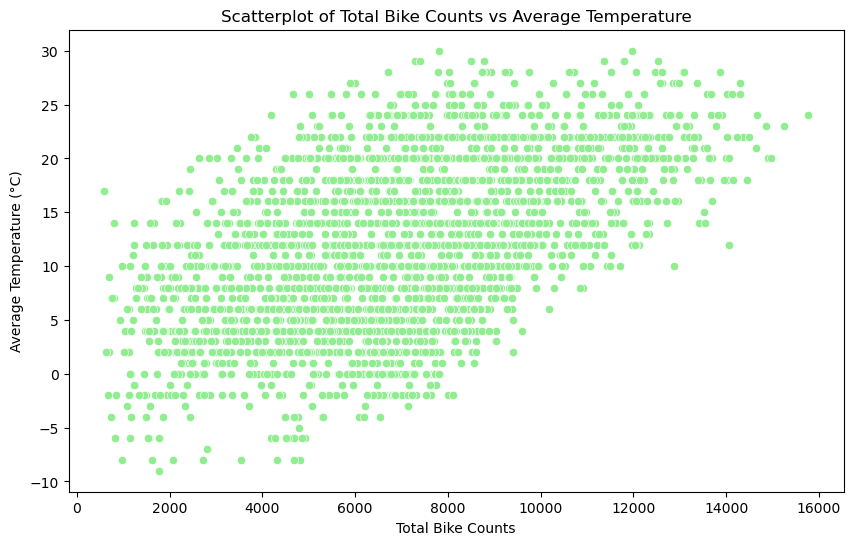

In [240]:
df_freiburg_1['avg.temp'] = (df_freiburg_1['min.temp'] + df_freiburg_1['max.temp']) / 2
# Round 'min.temp', 'max.temp' and 'avg.temp' columns to 0 decimal places
df_freiburg_1['min.temp'] = df_freiburg_1['min.temp'].round(0)
df_freiburg_1['max.temp'] = df_freiburg_1['max.temp'].round(0)
df_freiburg_1['avg.temp'] = df_freiburg_1['avg.temp'].round(0)

print(df_freiburg_1)
correlation_coef = df_freiburg_1['Total'].corr(df_freiburg_1['avg.temp'])
print("The correlation coefficient is: ", correlation_coef)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_freiburg_1, x='Total', y='avg.temp', color='lightgreen')

plt.title('Scatterplot of Total Bike Counts vs Average Temperature')
plt.xlabel('Total Bike Counts')
plt.ylabel('Average Temperature (°C)')

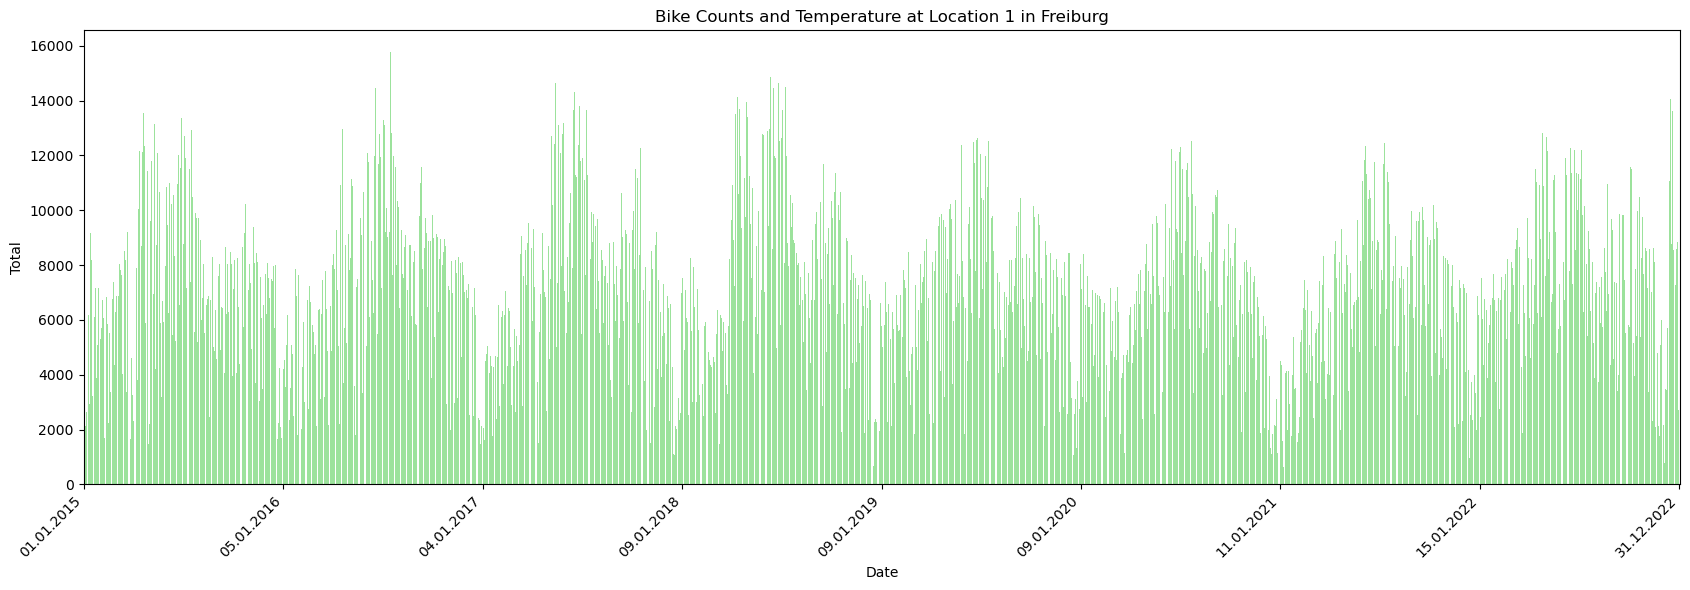

In [249]:
df_freiburg_1['date'] = df_freiburg_1['date'].dt.strftime('%d.%m.%Y')
# Create figure and axis
fig, ax = plt.subplots(figsize=(17, 6))

# Plot bike counts as a bar plot
sns.barplot(data=df_freiburg_1, x='date', y='Total', color='lightgreen', ax=ax)

plt.xticks(rotation=45, ha='right')  # 'ha' parameter sets horizontal alignment to 'right'

# Adjust layout to prevent overlap
plt.gca().xaxis.set_major_locator(MultipleLocator(365))

# Show plot
plt.title('Bike Counts and Temperature at Location 1 in Freiburg')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


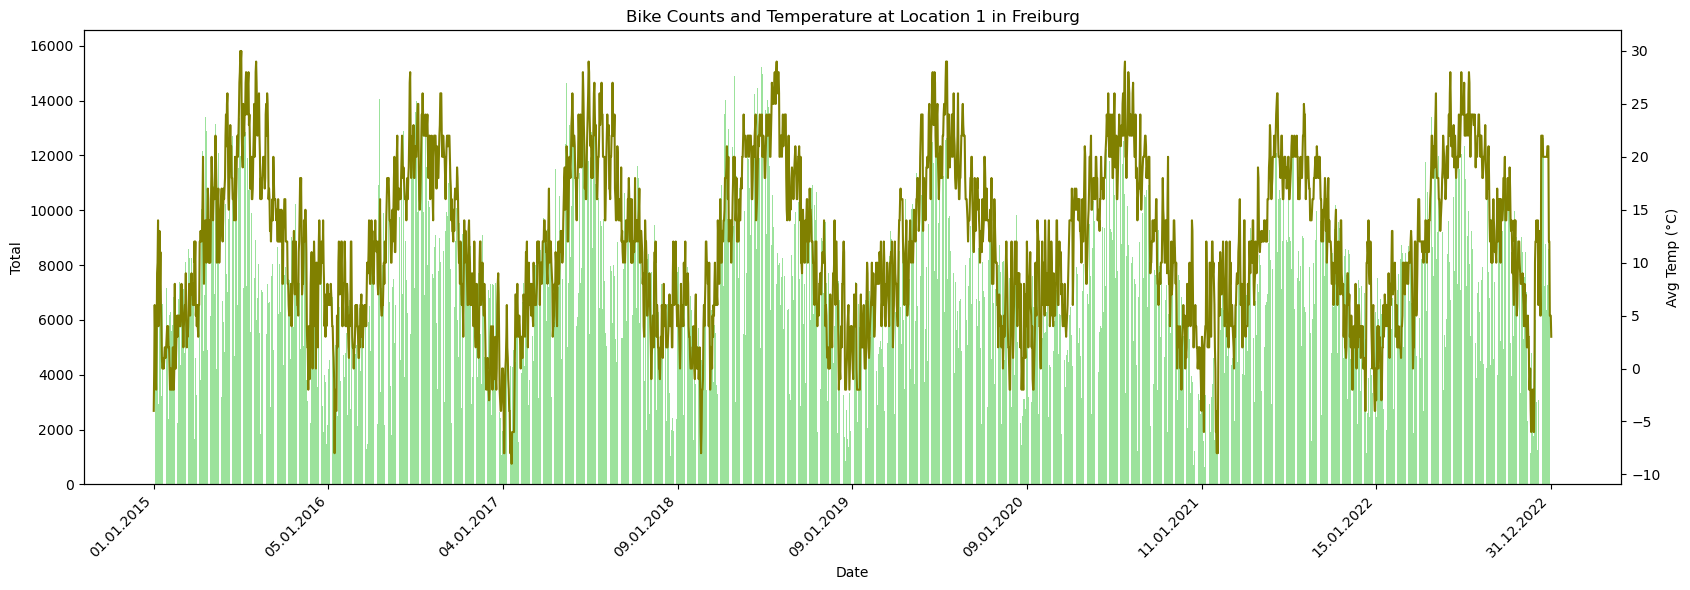

In [251]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(17, 6))

# Plot bike counts as a bar plot
sns.barplot(data=df_freiburg_1, x='date', y='Total', color='lightgreen', ax=ax)

# Set x-axis labels rotation
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.gca().xaxis.set_major_locator(MultipleLocator(365))

# Set title and labels
plt.title('Bike Counts and Temperature at Location 1 in Freiburg')
plt.xlabel('Date')

# Create a secondary y-axis for average temperature
ax2 = ax.twinx()

# Plot average temperature as a line plot
ax2.plot(df_freiburg_1['date'], df_freiburg_1['avg.temp'], color='olive', label='Avg Temp')

# Set y-axis label for the secondary y-axis
ax2.set_ylabel('Avg Temp (°C)')

# Show plot
plt.tight_layout()
plt.show()
